Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')
from string import ascii_letters
%matplotlib inline

In [2]:
import sys
sys.executable

'C:\\Users\\spnelson\\AppData\\Local\\Continuum\\anaconda3-5\\python.exe'

In [3]:
import os
os.getcwd()

'C:\\Users\\spnelson\\SF\\Personal Folders\\Spotify'

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.5.1


In [5]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Read dataset:

In [6]:
wiz = pd.read_csv('wiz khalifa data.csv', encoding='cp1252')


In [7]:
wiz.head()

,TITLE,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP,ALBUM
0,Boarding Pass,2009,87,88,56,-5,46,2.47,0,43,Flight School
1,Ms. Rightfernow,2009,148,73,82,-8,84,3.49,27,37,Flight School
2,Shame,2009,80,81,45,-6,47,3.56,17,37,Flight School
3,Dreamer,2009,74,49,78,-10,25,4.15,6,38,Flight School
4,Get Sum,2009,142,83,75,-6,82,4.29,2,35,Flight School


In [8]:
wiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
TITLE       107 non-null object
RELEASE     107 non-null int64
BPM         107 non-null int64
ENERGY      107 non-null int64
DANCE       107 non-null int64
LOUD        107 non-null int64
VALENCE     107 non-null int64
LENGTH      107 non-null float64
ACOUSTIC    107 non-null int64
POP         107 non-null int64
ALBUM       107 non-null object
dtypes: float64(1), int64(8), object(2)
memory usage: 8.4+ KB


The purpose of this file is to explore the metrics around Wiz Khalifa songs, visualize key aspects, and try to see if those aspects are good predictors for how popular his music is. I will also compare his songs' metrics to those of one of Spotify's most listened to playlists, Rap Caviar, which updates daily with the hottest rap music. The overall goal is to see what metrics could predict success of Wiz songs, and to benchmark against current trending songs. 

To Do:
1. popularity vs time
2. correlation between metrics and popularity - use ggpairs
3. more advanced ml models - xgboost
4. metrics for each album (avg popularity by album, incorporate sales/playback data)
5. see what differentiates top 5 songs from the rest
6. ML

First, plot histograms of each of the features of the songs given in the Spotify API: BPM, Popularity, Energy, Loudness, Danceability, Valence, Acousticness, Realease Year, and Length.

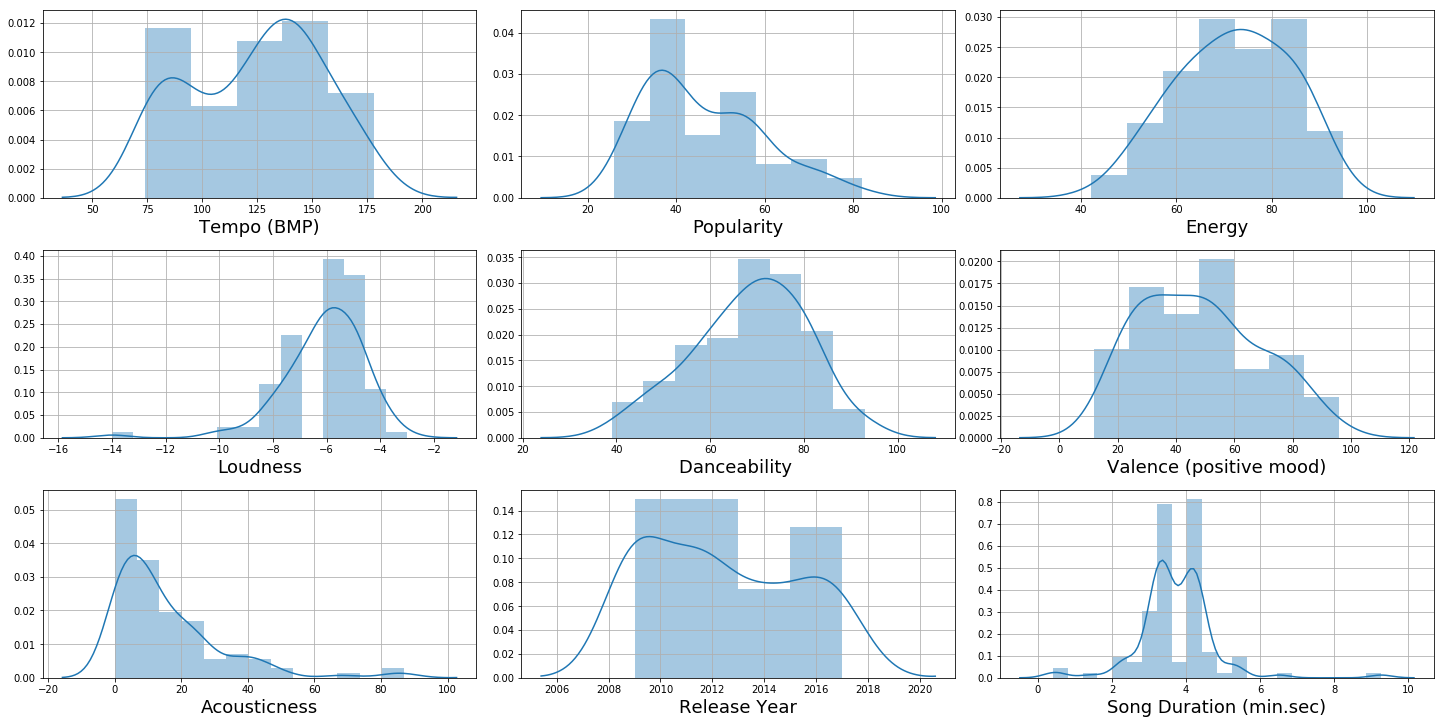

In [9]:
plt.figure(1, figsize=(20, 10),)

plt.subplot(331)
sns.distplot(wiz.BPM);
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(wiz.POP);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(wiz.ENERGY);
#plt.text(85, .010, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(wiz.LOUD);
#plt.text(-30, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(wiz.DANCE);
#plt.text(70, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(wiz.VALENCE);
#plt.text(80, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(wiz.ACOUSTIC);
#plt.text(80, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(wiz.RELEASE);
plt.xlabel('Release Year', fontsize=18)
plt.grid(True)

plt.subplot(339)
sns.distplot(wiz.LENGTH);
#plt.text(-1100, 0.002, r'$\mu≈\ 2004$', fontsize=22)
plt.xlabel('Song Duration (min.sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)

Wiz songs are typically high energy, loud, not acoustic, and on the lower end of popularity.

In [10]:
# See stats about the key metrics
wiz.describe(include = 'all')

,TITLE,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP,ALBUM
count,107,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000,107
unique,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,Ass Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONIFC
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
mean,NaN,2012.373832,123.850467,71.850467,68.401869,-6.093458,48.074766,3.726075,15.514019,46.17757,NaN
std,NaN,2.889550,30.149878,11.913053,12.066529,1.526698,20.479489,1.016770,16.558851,13.24644,NaN
min,NaN,2009.000000,74.000000,42.000000,39.000000,-14.000000,12.000000,0.400000,0.000000,26.00000,NaN
25%,NaN,2009.000000,95.000000,63.000000,60.500000,-7.000000,30.500000,3.240000,4.500000,36.00000,NaN
50%,NaN,2012.000000,130.000000,72.000000,70.000000,-6.000000,48.000000,3.560000,11.000000,43.00000,NaN
75%,NaN,2014.500000,146.000000,81.000000,78.000000,-5.000000,61.500000,4.200000,21.500000,56.00000,NaN


,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
RELEASE,1.000000,-0.010181,-0.422053,0.380673,0.121335,-0.209956,0.089577,-0.003265,0.431051
BPM,-0.010181,1.000000,-0.098007,0.111542,-0.021827,-0.050188,-0.072585,-0.217965,0.048326
ENERGY,-0.422053,-0.098007,1.000000,-0.341828,0.437528,0.197369,0.107267,-0.034374,-0.237524
DANCE,0.380673,0.111542,-0.341828,1.000000,-0.137234,0.076039,0.023628,-0.202936,0.197154
LOUD,0.121335,-0.021827,0.437528,-0.137234,1.000000,0.024666,-0.083013,0.029160,0.034882
VALENCE,-0.209956,-0.050188,0.197369,0.076039,0.024666,1.000000,-0.091666,0.068905,-0.002588
LENGTH,0.089577,-0.072585,0.107267,0.023628,-0.083013,-0.091666,1.000000,-0.170089,-0.073641
ACOUSTIC,-0.003265,-0.217965,-0.034374,-0.202936,0.029160,0.068905,-0.170089,1.000000,0.053944
POP,0.431051,0.048326,-0.237524,0.197154,0.034882,-0.002588,-0.073641,0.053944,1.000000


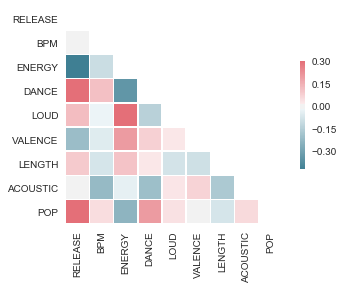

In [11]:
sns.set(style="white")
corr_subset = wiz.loc[:, ['RELEASE','BPM','ENERGY', 'DANCE', 'LOUD', 'VALENCE', 'LENGTH', 'ACOUSTIC', 'POP']]
corr = wiz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

The correlation diagram shows that Dance and Release, Loud and Energy, and Pop and Release are positively correlated. Energy and Relase and Energy and Dance are negatively correlated. However, none of these correlations are very strong ( all less than plus or minus .4) so the metrics are not highly correlated with each other.

In [12]:
grouped = wiz.groupby(['ALBUM']).mean().sort_values('POP', ascending=False)
grouped

,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
ALBUM,,,,,,,,,
Single,2011.000000,95.000000,65.000000,55.000000,-7.000000,55.000000,3.380000,9.000000,63.000000
Laugh Now Fly Later,2016.923077,118.538462,66.230769,79.076923,-6.692308,52.846154,3.916923,12.615385,61.230769
Rolling Papers,2011.000000,122.357143,71.571429,65.928571,-6.071429,51.428571,2.943571,30.928571,58.500000
Khalifa,2015.928571,116.928571,64.142857,71.714286,-5.571429,37.714286,4.202857,18.071429,55.214286
Blacc Hollywood,2014.000000,140.687500,67.437500,69.625000,-5.625000,35.000000,3.706250,6.750000,40.625000
Deal or No Deal,2009.000000,129.133333,80.733333,60.933333,-5.600000,55.666667,3.854667,11.400000,40.066667
Flight School,2009.000000,118.176471,76.352941,66.705882,-7.529412,52.529412,4.040000,8.352941,37.823529
ONIFC,2012.000000,121.705882,74.941176,67.470588,-5.470588,50.941176,3.443529,22.352941,35.058824


The most popular Wiz album is Laugh Now Fly Later, which is also his most recent release. His single, "Young, Wild, and Free" is more popular than the average popularity of each album. 

In [13]:
list(grouped)

['RELEASE',
 'BPM',
 'ENERGY',
 'DANCE',
 'LOUD',
 'VALENCE',
 'LENGTH',
 'ACOUSTIC',
 'POP']

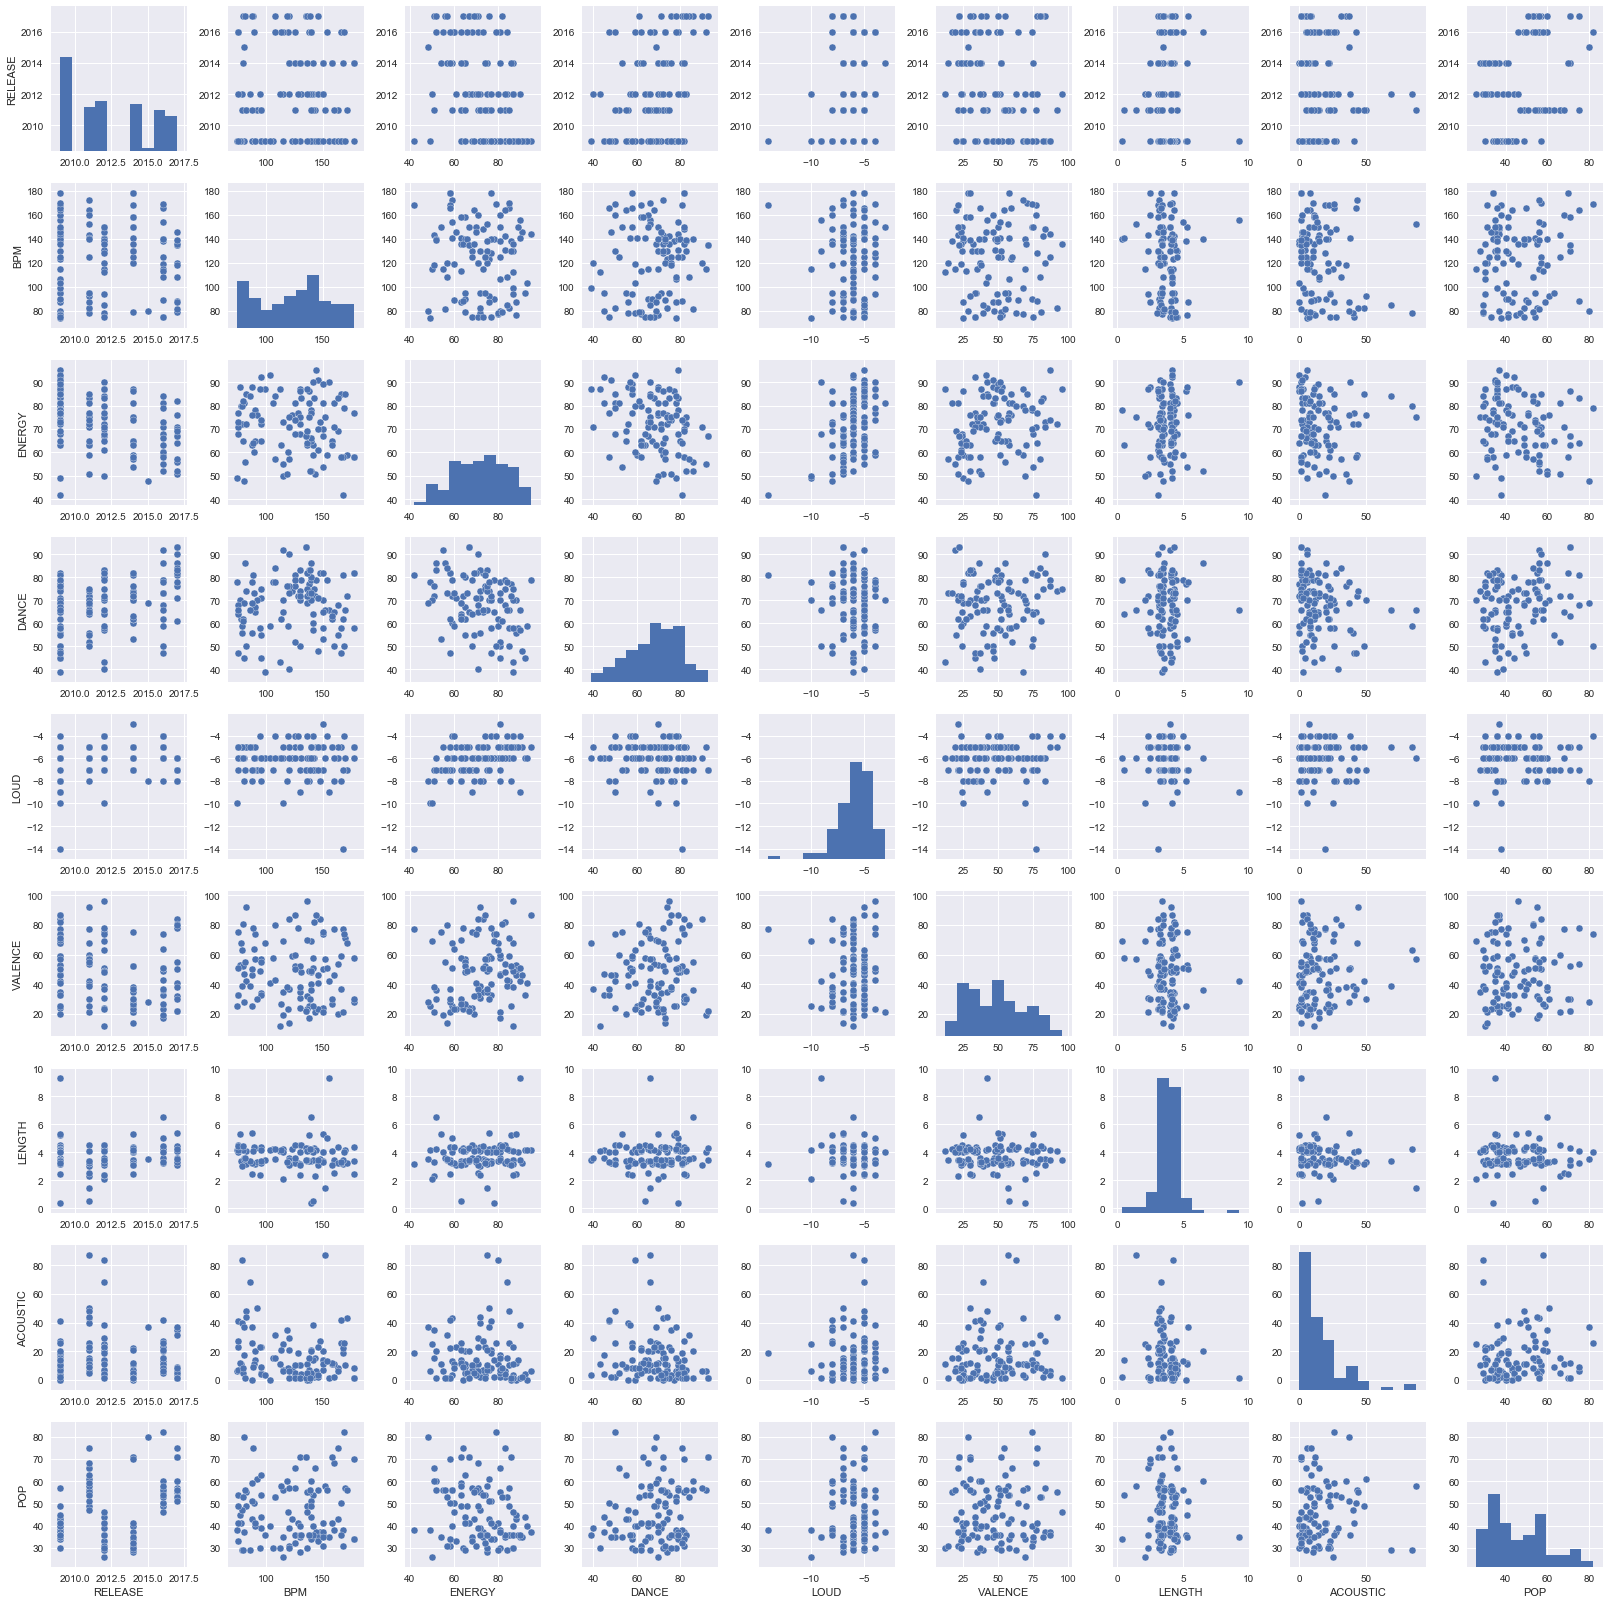

In [14]:
#scatterplot
sns.set()
sns.pairplot(corr_subset, size = 2.5)
plt.show()

In [15]:
corr_subset.scatter_matrix()

The paired plot shows directional relationship between metrics.

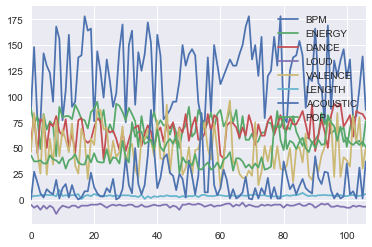

In [16]:
data1 = wiz.loc[:,["BPM","ENERGY","DANCE", "LOUD", "VALENCE", "LENGTH", "ACOUSTIC", "POP"]]
data1.plot()

In [17]:
df = pd.DataFrame(grouped)
df

,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
ALBUM,,,,,,,,,
Single,2011.000000,95.000000,65.000000,55.000000,-7.000000,55.000000,3.380000,9.000000,63.000000
Laugh Now Fly Later,2016.923077,118.538462,66.230769,79.076923,-6.692308,52.846154,3.916923,12.615385,61.230769
Rolling Papers,2011.000000,122.357143,71.571429,65.928571,-6.071429,51.428571,2.943571,30.928571,58.500000
Khalifa,2015.928571,116.928571,64.142857,71.714286,-5.571429,37.714286,4.202857,18.071429,55.214286
Blacc Hollywood,2014.000000,140.687500,67.437500,69.625000,-5.625000,35.000000,3.706250,6.750000,40.625000
Deal or No Deal,2009.000000,129.133333,80.733333,60.933333,-5.600000,55.666667,3.854667,11.400000,40.066667
Flight School,2009.000000,118.176471,76.352941,66.705882,-7.529412,52.529412,4.040000,8.352941,37.823529
ONIFC,2012.000000,121.705882,74.941176,67.470588,-5.470588,50.941176,3.443529,22.352941,35.058824


[Text(0,0,'Flight School'),
 Text(0,0,'Deal or No Deal'),
 Text(0,0,'Rolling Papers'),
 Text(0,0,'Single'),
 Text(0,0,'ONIFC'),
 Text(0,0,'Blacc Hollywood'),
 Text(0,0,'Khalifa'),
 Text(0,0,'Laugh Now Fly Later')]

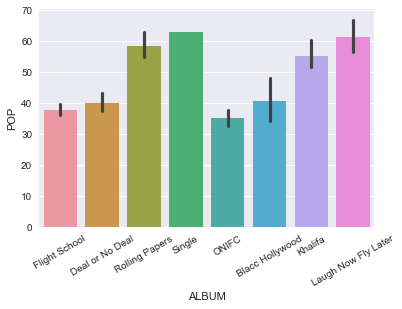

In [18]:
albums = sns.barplot(x="ALBUM", y="POP", data=wiz)
albums.set_xticklabels(albums.get_xticklabels(), rotation=30)

In [40]:
wiz.iplot(kind='bar', x='ALBUM',y='POP')

[Text(0,0,'Flight School'),
 Text(0,0,'Deal or No Deal'),
 Text(0,0,'Rolling Papers'),
 Text(0,0,'Single'),
 Text(0,0,'ONIFC'),
 Text(0,0,'Blacc Hollywood'),
 Text(0,0,'Khalifa'),
 Text(0,0,'Laugh Now Fly Later')]

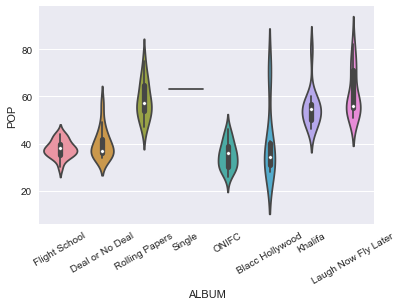

In [19]:
#boxplot of popularity by album/release (do violin plot)
plot2 = sns.violinplot(x="ALBUM", y="POP", data=wiz, size=10)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=30)

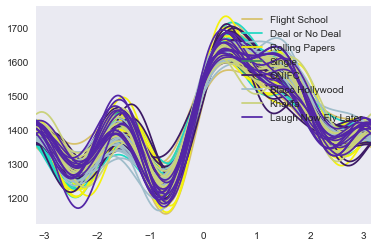

In [20]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(wiz.drop("TITLE", axis=1), "ALBUM")

In [21]:
#scatterplot of attributes colored by album


In [22]:
#SLR to see correlated features

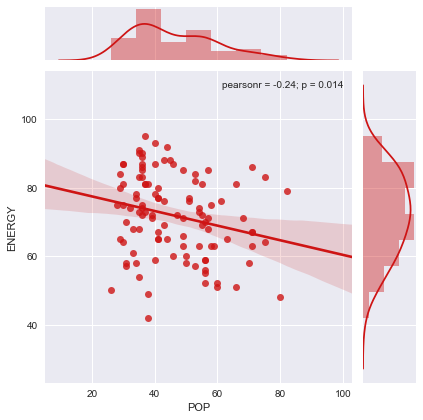

In [23]:
# jointplot to compare pop and energy
sns.jointplot(wiz.loc[:,'POP'], wiz.loc[:,'ENERGY'], kind="regg", color="#ce1414")

In [46]:
wiz.iplot(kind='scatter', x='POP', y='ENERGY', mode='markers', size=10)

C:\Users\spnelson\AppData\Local\Continuum\anaconda3-5\lib\site-packages\matplotlib\contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label', 'color'



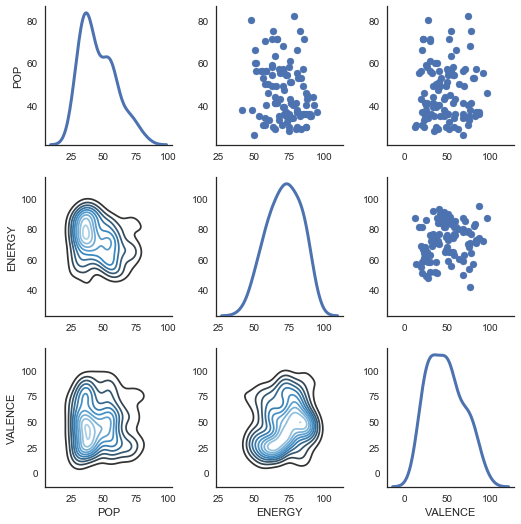

In [24]:
# What about three or more feauture comparision ? For this purpose we can use pair grid plot
sns.set(style="white")
df = wiz.loc[:,['POP','ENERGY','VALENCE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [25]:
# Create bins for popularity to better see which songs are popular
wiz.pop_bins = pd.cut(wiz.POP, 5)

In [26]:
wiz.pop_bins.head()

0      (37.2, 48.4]
1    (25.944, 37.2]
2    (25.944, 37.2]
3      (37.2, 48.4]
4    (25.944, 37.2]
Name: POP, dtype: category
Categories (5, interval[float64]): [(25.944, 37.2] < (37.2, 48.4] < (48.4, 59.6] < (59.6, 70.8] < (70.8, 82.0]]

In [27]:
counts = wiz.pop_bins.value_counts()
print(counts)

(25.944, 37.2]    38
(48.4, 59.6]      29
(37.2, 48.4]      24
(70.8, 82.0]       8
(59.6, 70.8]       8
Name: POP, dtype: int64


Text(0.5,1,'Popularity Bins')

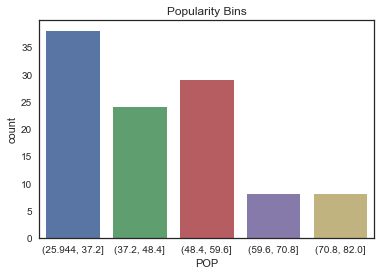

In [28]:
sns.countplot(wiz.pop_bins).set_title("Popularity Bins")

In [54]:
clarity_color_table = pd.crosstab(index=wiz.pop_bins, 
                          columns=wiz["ALBUM"])

print(clarity_color_table)

ALBUM           Blacc Hollywood  Deal or No Deal  Flight School  Khalifa  \
POP                                                                        
(25.944, 37.2]               10                8              8        0   
(37.2, 48.4]                  3                5              9        1   
(48.4, 59.6]                  0                2              0       11   
(59.6, 70.8]                  1                0              0        1   
(70.8, 82.0]                  2                0              0        1   

ALBUM           Laugh Now Fly Later  ONIFC  Rolling Papers  Single  
POP                                                                 
(25.944, 37.2]                    0     12               0       0  
(37.2, 48.4]                      0      5               1       0  
(48.4, 59.6]                      8      0               8       0  
(59.6, 70.8]                      1      0               4       1  
(70.8, 82.0]                      4      0           

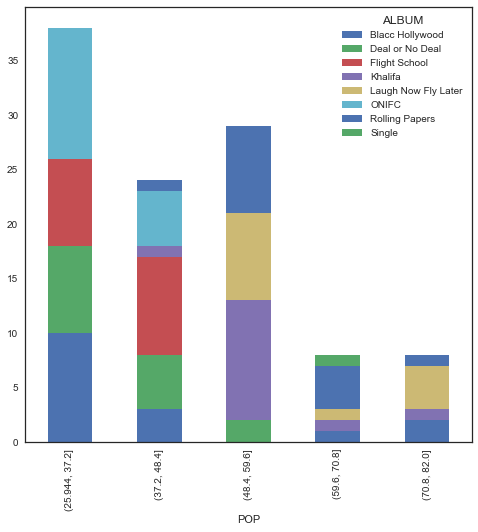

In [55]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [31]:
#compare with rap caviar playlist
rap_cav = pd.read_csv('rap_caviar.csv')
rap_cav.head

<bound method NDFrame.head of      #                                              TITLE  \
0    1                                                KOD   
1    2                                      Nice For What   
2    3                                    Walk It Talk It   
3    4                                              JAPAN   
4    5                           Look Alive (feat. Drake)   
5    6                                               1942   
6    7                                          Plug Walk   
7    8                                          Esskeetit   
8    9                         Powerglide (feat. Juicy J)   
9   10                    Ric Flair Drip (& Metro Boomin)   
10  11                                             Motiv8   
11  12                                               SAD!   
12  13               Pineapple (feat. Gucci Mane & Quavo)   
13  14                                      420 Freestyle   
14  15                      Creeping (feat. Rich the Ki

Create  joint distribution plots to compare with Rap Caviar playlist.

C:\Users\spnelson\AppData\Local\Continuum\anaconda3-5\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\spnelson\AppData\Local\Continuum\anaconda3-5\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



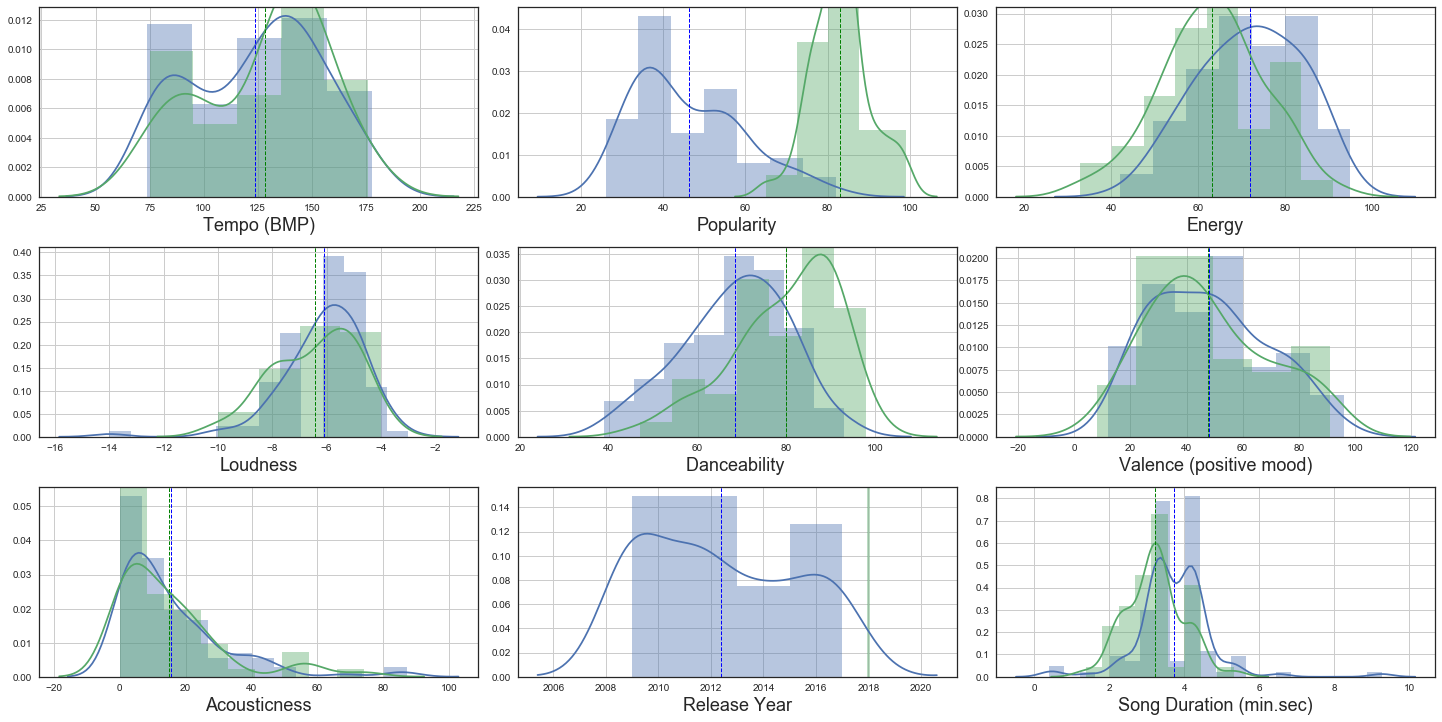

In [32]:
plt.figure(1, figsize=(20, 10),)

plt.subplot(331)
sns.distplot(wiz.BPM);
plt.axvline(wiz.BPM.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.BPM);
plt.axvline(rap_cav.BPM.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(wiz.POP);
plt.axvline(wiz.POP.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.POP);
plt.axvline(rap_cav.POP.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(wiz.ENERGY);
plt.axvline(wiz.ENERGY.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.ENERGY);
plt.axvline(rap_cav.ENERGY.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(wiz.LOUD);
plt.axvline(wiz.LOUD.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.LOUD);
plt.axvline(rap_cav.LOUD.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Loudness', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(wiz.DANCE);
plt.axvline(wiz.DANCE.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.DANCE);
plt.axvline(rap_cav.DANCE.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(wiz.VALENCE);
plt.axvline(wiz.VALENCE.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.VALENCE);
plt.axvline(rap_cav.VALENCE.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(wiz.ACOUSTIC);
plt.axvline(wiz.ACOUSTIC.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.ACOUSTIC);
plt.axvline(rap_cav.ACOUSTIC.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(wiz.RELEASE);
plt.axvline(wiz.RELEASE.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.RELEASE);
#plt.axvline(rap_cav.RELEASE.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Release Year', fontsize=18)
plt.grid(True)

plt.subplot(339)
sns.distplot(wiz.LENGTH);
plt.axvline(wiz.LENGTH.mean(), color='blue', linestyle='dashed', linewidth=1);
sns.distplot(rap_cav.LENGTH);
plt.axvline(rap_cav.LENGTH.mean(), color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Song Duration (min.sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)

On average, the Rap Cavier is significantly more popular, has less energy, is more danceable, and has shorter songs than Wiz. However, they have very similar loudness, valence, and acousticness.

,#,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
#,1.000000,NaN,0.003234,-0.006199,-0.093018,0.054519,-0.037728,-0.098567,0.124131,-0.445804
RELEASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPM,0.003234,NaN,1.000000,0.152369,0.181734,-0.005541,0.310878,0.112214,0.065871,-0.234579
ENERGY,-0.006199,NaN,0.152369,1.000000,-0.349884,0.632331,0.363388,0.303932,0.129294,-0.024989
DANCE,-0.093018,NaN,0.181734,-0.349884,1.000000,0.013775,0.030624,-0.051828,-0.006251,-0.159271
LOUD,0.054519,NaN,-0.005541,0.632331,0.013775,1.000000,0.114348,0.333455,0.178090,-0.133138
VALENCE,-0.037728,NaN,0.310878,0.363388,0.030624,0.114348,1.000000,0.051403,0.124454,0.000504
LENGTH,-0.098567,NaN,0.112214,0.303932,-0.051828,0.333455,0.051403,1.000000,-0.042290,-0.175914
ACOUSTIC,0.124131,NaN,0.065871,0.129294,-0.006251,0.178090,0.124454,-0.042290,1.000000,0.093611
POP,-0.445804,NaN,-0.234579,-0.024989,-0.159271,-0.133138,0.000504,-0.175914,0.093611,1.000000


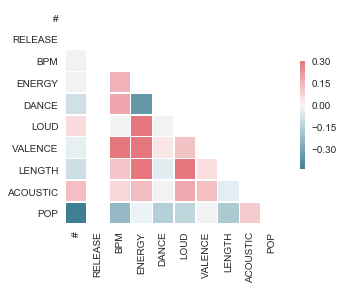

In [33]:
sns.set(style="white")
corr_subset = rap_cav.loc[:, ['RELEASE','BPM','ENERGY', 'DANCE', 'LOUD', 'VALENCE', 'LENGTH', 'ACOUSTIC', 'POP']]
corr = rap_cav.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

In [34]:
rap_cav.describe()

,#,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
count,50.00000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,2018.0,128.180000,63.200000,79.920000,-6.440000,47.760000,3.215600,14.920000,83.060000
std,14.57738,0.0,28.783279,11.969349,11.769625,1.540739,21.744866,0.758035,16.455059,6.932355
min,1.00000,2018.0,75.000000,33.000000,47.000000,-10.000000,8.000000,1.370000,0.000000,65.000000
25%,13.25000,2018.0,100.250000,56.000000,73.250000,-8.000000,34.000000,2.670000,3.000000,79.000000
50%,25.50000,2018.0,139.000000,63.500000,82.500000,-6.000000,44.000000,3.205000,10.500000,83.000000
75%,37.75000,2018.0,145.750000,69.750000,88.000000,-5.000000,60.750000,3.525000,20.000000,86.000000
max,50.00000,2018.0,176.000000,91.000000,98.000000,-4.000000,91.000000,5.320000,74.000000,99.000000


In [35]:
wiz.describe()

,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000
mean,2012.373832,123.850467,71.850467,68.401869,-6.093458,48.074766,3.726075,15.514019,46.17757
std,2.889550,30.149878,11.913053,12.066529,1.526698,20.479489,1.016770,16.558851,13.24644
min,2009.000000,74.000000,42.000000,39.000000,-14.000000,12.000000,0.400000,0.000000,26.00000
25%,2009.000000,95.000000,63.000000,60.500000,-7.000000,30.500000,3.240000,4.500000,36.00000
50%,2012.000000,130.000000,72.000000,70.000000,-6.000000,48.000000,3.560000,11.000000,43.00000
75%,2014.500000,146.000000,81.000000,78.000000,-5.000000,61.500000,4.200000,21.500000,56.00000
max,2017.000000,178.000000,95.000000,93.000000,-3.000000,96.000000,9.270000,87.000000,82.00000


In [36]:
# Make linear models for both to predict popularity 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# assign feature columns as list:
feature_cols = ['BPM', 'ENERGY', 'DANCE', 'VALENCE', 'ACOUSTIC']

# assign to X a subset of the data only using feature columns
X = wiz[feature_cols]

# assign to y the response variable, POP
y = wiz['POP']

# import sklearn to train test split
from sklearn.cross_validation import train_test_split

# assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X,y)

# import sk learn linear regression
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

#fit model to training data
linreg.fit(X_train, y_train)

C:\Users\spnelson\AppData\Local\Continuum\anaconda3-5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# interpret coefficients
print(linreg.intercept_)

# print beta coeffs
print(linreg.coef_)

# zip can pair feature names and coeffs together
zip(feature_cols, linreg.coef_)

# r squared
linreg.score(X_train, y_train)

56.31739561777107
[ 0.00244638 -0.34149785  0.11304103  0.08079033  0.08619681]


0.13908038485845653

The linear model has a very low r-squared of .066, so it is not the best model.

In [38]:
# making predictions on our model
y_pred = linreg.predict(X_test)

In [39]:
# evaluate model
from sklearn import metrics

#print the result of RMSE - 13 is very high so it is a bad score
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

15.394076425395701
